To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.Date_month_year

0       22-Apr-15
1       04-Aug-15
2       18-Apr-15
3       05-Jul-15
4       26-May-15
          ...    
2219    04-Feb-15
2220    06-Feb-15
2221    06-Sep-15
2222    23-Jun-15
2223    24-Jun-15
Name: Date_month_year, Length: 2224, dtype: object

**Creating 2 additional columns month and day, they are derived using Date_month_year**

In [5]:
df['month']=df['Date_month_year'].apply(lambda x:x.split('-')[1])
df['day']=df['Date_month_year'].apply(lambda x:x.split('-')[0])

In [6]:
df.month.value_counts()

Jun    1046
Apr     375
May     317
Aug      67
Dec      65
Feb      59
Sep      55
Jan      55
Oct      53
Jul      49
Mar      45
Nov      38
Name: month, dtype: int64

In [7]:
monthly_count=df.groupby('month').aggregate(['count'])['Customer Complaint']

In [8]:
monthly_count.reset_index(inplace=True)

In [9]:
monthly_count

,month,count
0,Apr,375
1,Aug,67
2,Dec,65
3,Feb,59
4,Jan,55
5,Jul,49
6,Jun,1046
7,Mar,45
8,May,317
9,Nov,38


In [10]:
daily_count=df.groupby('day').aggregate(['count'])['Customer Complaint']

In [11]:
daily_count.reset_index(inplace=True)

In [12]:
daily_count

,day,count
0,04,206
1,05,131
2,06,272
3,13,68
4,14,54
5,15,58
6,16,65
7,17,60
8,18,69
9,19,50


## Trend charts for the number of complaints by day.

In [13]:
import seaborn as sns
from matplotlib import style

Text(0.5, 1.0, 'Complaints by day')

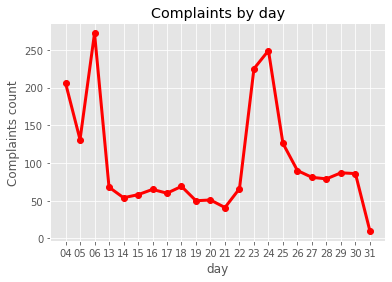

In [14]:
style.use('ggplot')
plt.plot(daily_count['day'],daily_count['count'],linewidth=3,marker='o',color='red')
plt.xlabel('day')
plt.ylabel('Complaints count')
plt.title('Complaints by day')

Text(0.5, 1.0, 'Complaints by day')

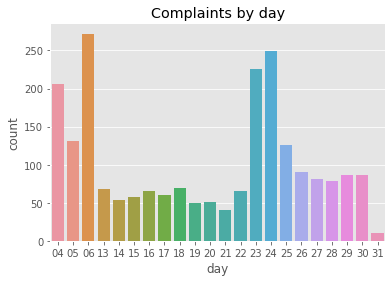

In [15]:
sns.barplot(x=daily_count['day'],y=daily_count['count'],data=daily_count)
plt.title('Complaints by day')

## Trend charts for the number of complaints by Month.

Text(0.5, 1.0, 'Complaints by Month')

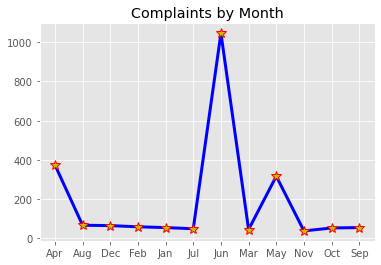

In [16]:
style.use('ggplot')
plt.plot(monthly_count['month'],monthly_count['count'],linewidth=3,marker='*',markersize=10,markerfacecolor ='y'
         ,markeredgecolor='r' ,color='b')
plt.title('Complaints by Month')

Text(0.5, 1.0, 'Complaints by Month')

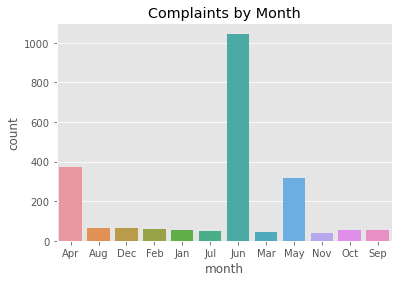

In [17]:
sns.barplot(x=monthly_count['month'],y=monthly_count['count'],data=monthly_count)
plt.title('Complaints by Month')

## Which complaint types are maximum i.e., around internet, network issues, or across any other domains. 

**Identified below complaint types looking at the data.**
* Throttling
* Internet
* Billing
* Bait, Switch
* network
* cable
* speed
* pricing
* telephone
* tv
* broadband

In [18]:
def get_complaintType(text):
    types=['throttling','internet','billing','bait','switch','network','cable','speed'
           ,'pricing','telephone','tv','broadband']
    for t in types:
        if text.lower().find(t)>=0:
            return t
        else:
            continue
    return 'others'
        

In [19]:
df['Complaint Type']=df['Customer Complaint'].apply(lambda x:get_complaintType(x))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
 11  month                        2224 non-null   object
 12  day                          2224 non-null   object
 13  Complaint Type               2224

In [21]:
complaint_types=df.groupby('Complaint Type').aggregate('count')['Customer Complaint'].reset_index()

In [22]:
complaint_types.rename(columns={'Customer Complaint':'Frequency'},inplace=True)

In [23]:
complaint_types

,Complaint Type,Frequency
0,bait,16
1,billing,266
2,broadband,5
3,cable,29
4,internet,511
5,network,2
6,others,1239
7,pricing,30
8,speed,66
9,switch,2


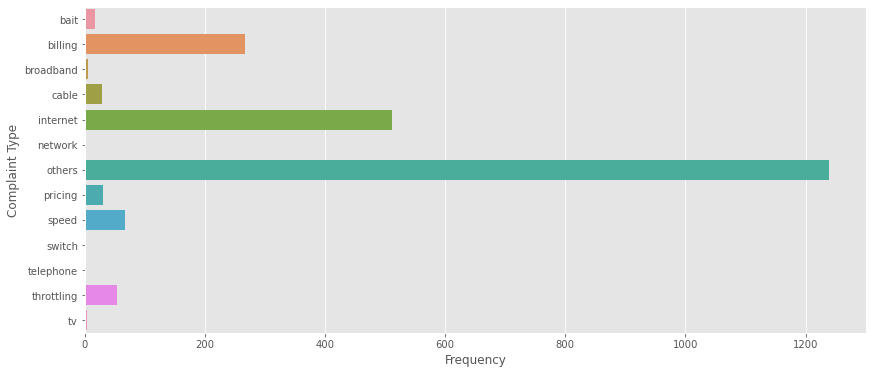

In [24]:
plt.figure(figsize=(14,6))
sns.barplot(y='Complaint Type',x='Frequency',data=complaint_types)

## New categorical variable Status_new with value as Open and Closed

In [25]:
df.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [26]:
df['Status_new']=np.where(((df.Status=='Open') | (df.Status=='Pending')),'Open',
                          np.where(((df.Status=='Closed') | (df.Status=='Solved')),'Closed',df.Status))

In [27]:
df.Status_new.value_counts()

Closed    1707
Open       517
Name: Status_new, dtype: int64

## State wise complaints categorized by open and closed status

In [28]:
state_complaints=df.groupby(['State','Status_new']).aggregate('count')['Customer Complaint'].reset_index()

In [29]:
state_complaints.rename(columns={'Customer Complaint':'ComplaintCount'},inplace=True)

In [30]:
state_complaints

,State,Status_new,ComplaintCount
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,Open,11
73,Washington,Closed,75
74,Washington,Open,23
75,West Virginia,Closed,8


## Plotting stacked bar plot for open and closed complaints by state

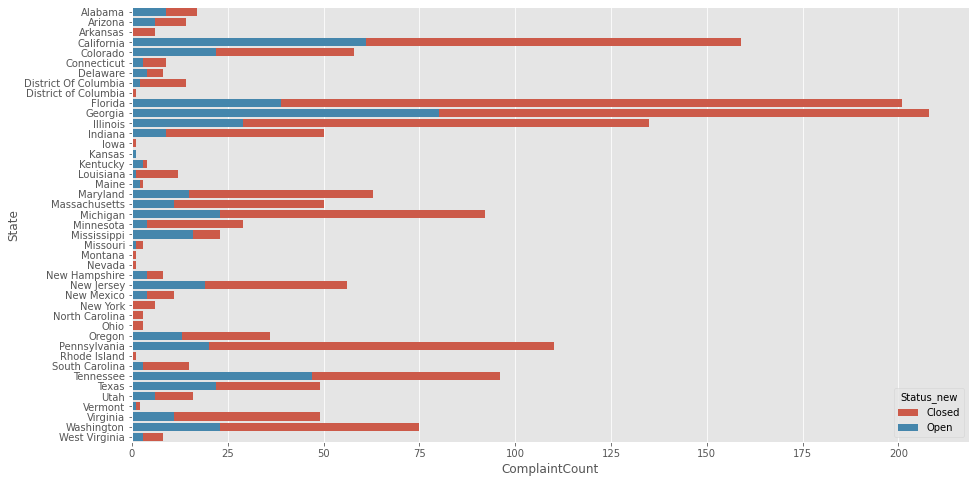

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(state_complaints.ComplaintCount,state_complaints.State,hue=state_complaints.Status_new,dodge=False)

**From the above chart, we can say these are the top 3 states with number of complaints.**
* 1) Georgia
* 2) Florida
* 3) California


## Alternate method to plot stacked barplot of open and closed complaints state wise

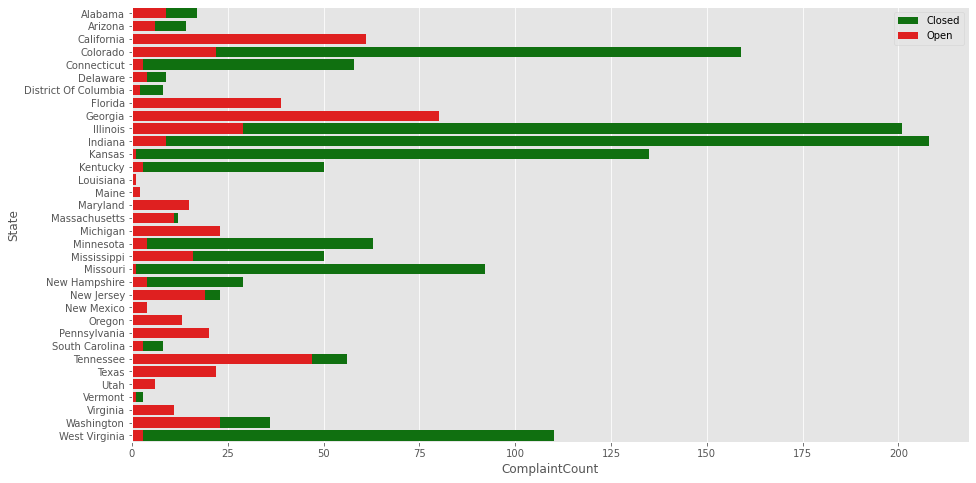

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(y='State',x='ComplaintCount',data=state_complaints[state_complaints.Status_new=='Closed'],color='green',label='Closed')
sns.barplot(y='State',x='ComplaintCount',data=state_complaints[state_complaints.Status_new=='Open'],color='red',label='Open')
plt.legend()
plt.show()

## Plotting only unresolved complaints

Text(0.5, 1.0, 'Unresolved Complaints')

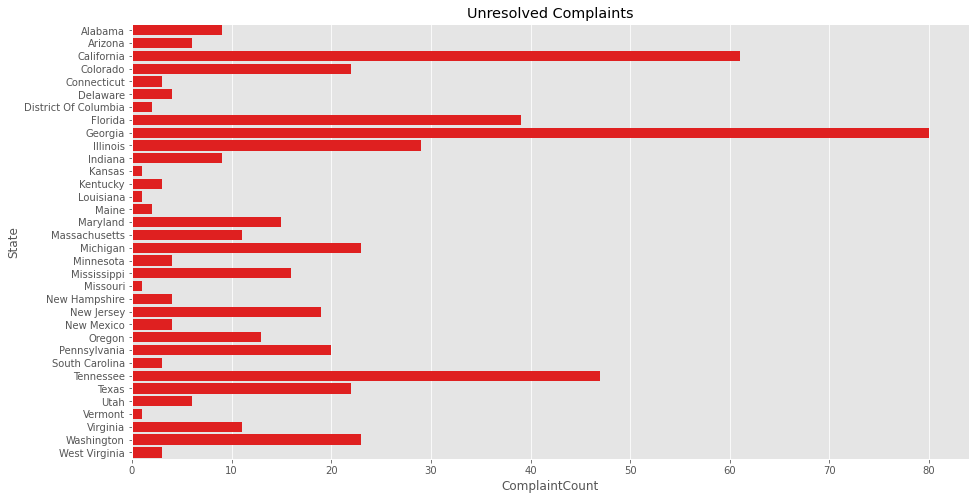

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(y='State',x='ComplaintCount',data=state_complaints[state_complaints.Status_new=='Open'],color='Red')
plt.title('Unresolved Complaints')

**Top 3 states in unresolved complaints**
* 1)Georgia
* 2)California
* 3)Tennessee

**Percentage of complaints resolved till date, which were received through the Internet and customer care calls**

In [34]:
complaints_dtl=df.groupby(['Status_new','Received Via']).aggregate('count')['Customer Complaint'].reset_index()

In [35]:
complaints_dtl

,Status_new,Received Via,Customer Complaint
0,Closed,Customer Care Call,864
1,Closed,Internet,843
2,Open,Customer Care Call,255
3,Open,Internet,262


In [36]:
complaints_dtl['Percentage'] = complaints_dtl['Customer Complaint'].apply(lambda x:(x/df.shape[0])*100)

In [37]:
complaints_dtl

,Status_new,Received Via,Customer Complaint,Percentage
0,Closed,Customer Care Call,864,38.848921
1,Closed,Internet,843,37.904676
2,Open,Customer Care Call,255,11.465827
3,Open,Internet,262,11.780576


**From the above table we can say**
* 1) 38.84% of complaints are resolved through Customer care call
* 2) 37.9% of complaints are resolved through Internet